### Perform a complete EDA workflow on a given dataset:  Data cleaning, Univariate & bivariate analysis, Outlier detection, Missing value treatment, Feature correlation analysis.

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder

In [44]:
df = pd.read_csv("/kaggle/input/adult-income/adult.csv")

In [62]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,<bound method Series.dropna of 1 United...,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,<bound method Series.dropna of 1 United...,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,<bound method Series.dropna of 1 United...,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,<bound method Series.dropna of 1 United...,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,<bound method Series.dropna of 1 United...,<=50K


In [46]:
df=df.replace('?',np.nan)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [48]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [49]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [50]:
df.shape

(32561, 15)

In [53]:
def remnull(df):
    import math
    th = 2
    import pandas as pd
    for i,row in df.iterrows():
        count=0
        for col in df:
            if(pd.isna(row[col])):
                count += 1
        if (count>= th):
            df=df.drop(index = i)
    return df    

In [54]:
df=remnull(df)

In [55]:
df.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    556
income              0
dtype: int64

In [56]:
df.occupation=df.occupation.fillna(mode[0])

In [57]:
df.occupation.isnull().sum()

0

In [35]:
mode =df.occupation.mode() ##finding mode

In [58]:
df.occupation.unique()

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [59]:
df['native.country']=df['native.country'].dropna

In [60]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [61]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30725.000000,3.072500e+04,30725.000000,30725.000000,30725.000000,30725.000000
mean,38.439512,1.898538e+05,10.129699,1105.785094,88.889959,40.946461
std,13.119665,1.054585e+05,2.562702,7497.027762,405.613208,11.987385
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178330e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785170e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.373170e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


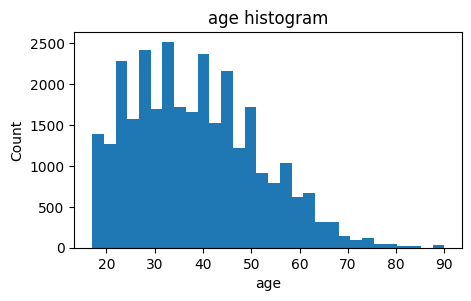

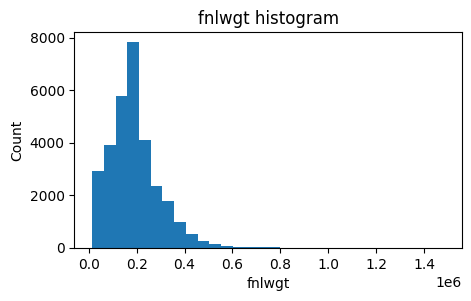

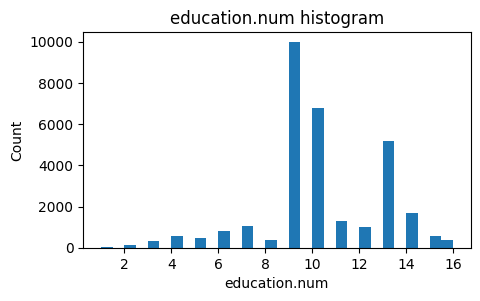

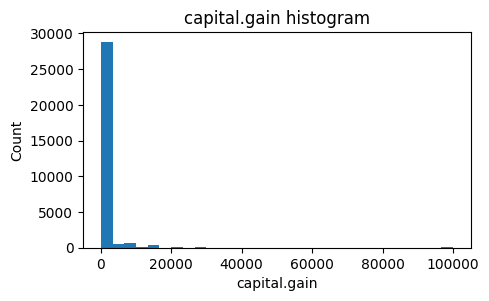

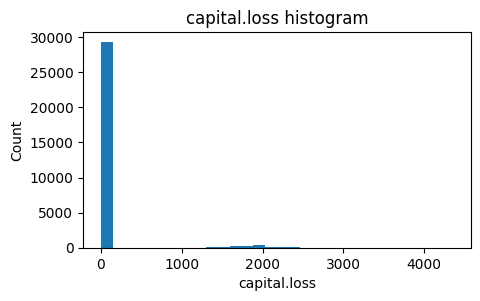

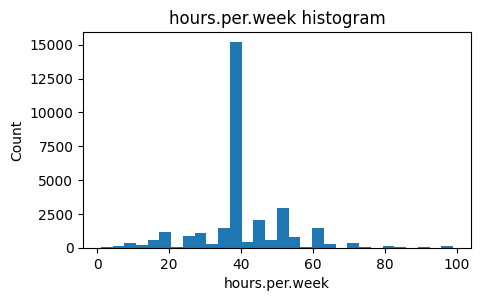

In [68]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):  # check if numeric
        plt.figure(figsize=(5, 2.8))
        plt.hist(df[col].dropna(), bins=30)
        plt.title(f"{col} histogram")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

In [74]:
df.income.value_counts()

income
<=50K    23075
>50K      7650
Name: count, dtype: int64

#### Visualizing the relationship between hours worked in a week and income

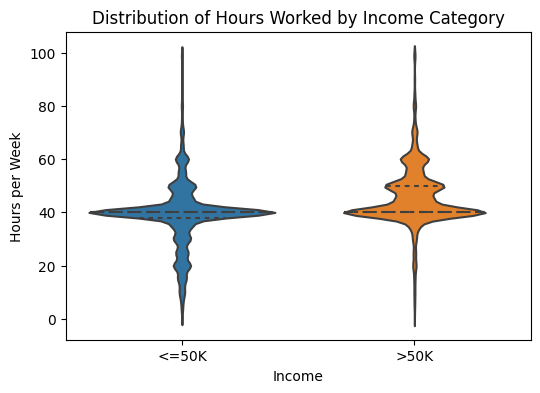

In [76]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='income', y='hours.per.week', data=df, inner='quartile')
plt.title('Distribution of Hours Worked by Income Category')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

#### Detecting outliers by hours worked per week

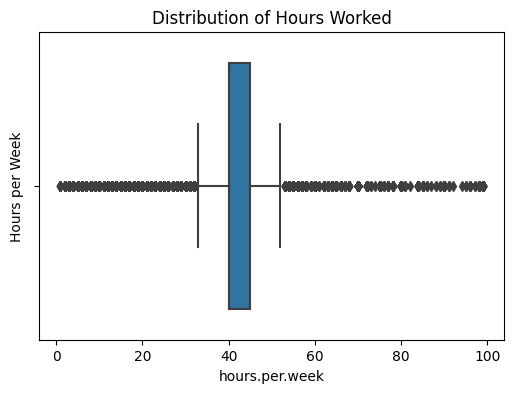

In [79]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='hours.per.week', data=df)
plt.title('Distribution of Hours Worked')
##plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

In [84]:
OH = OneHotEncoder(sparse_output=False)

In [96]:
cat_cols = ['income', 'race', 'sex']

OH = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_array = OH.fit_transform(df[cat_cols])

encoded_col_names = OH.get_feature_names_out()

df_encoded = pd.DataFrame(encoded_array, columns=encoded_col_names, index=df.index)

df_viz = df.drop(df.select_dtypes(include=['object']).columns, axis =1)

df_viz = df_viz.join(df_encoded)


##### Feature Correlation

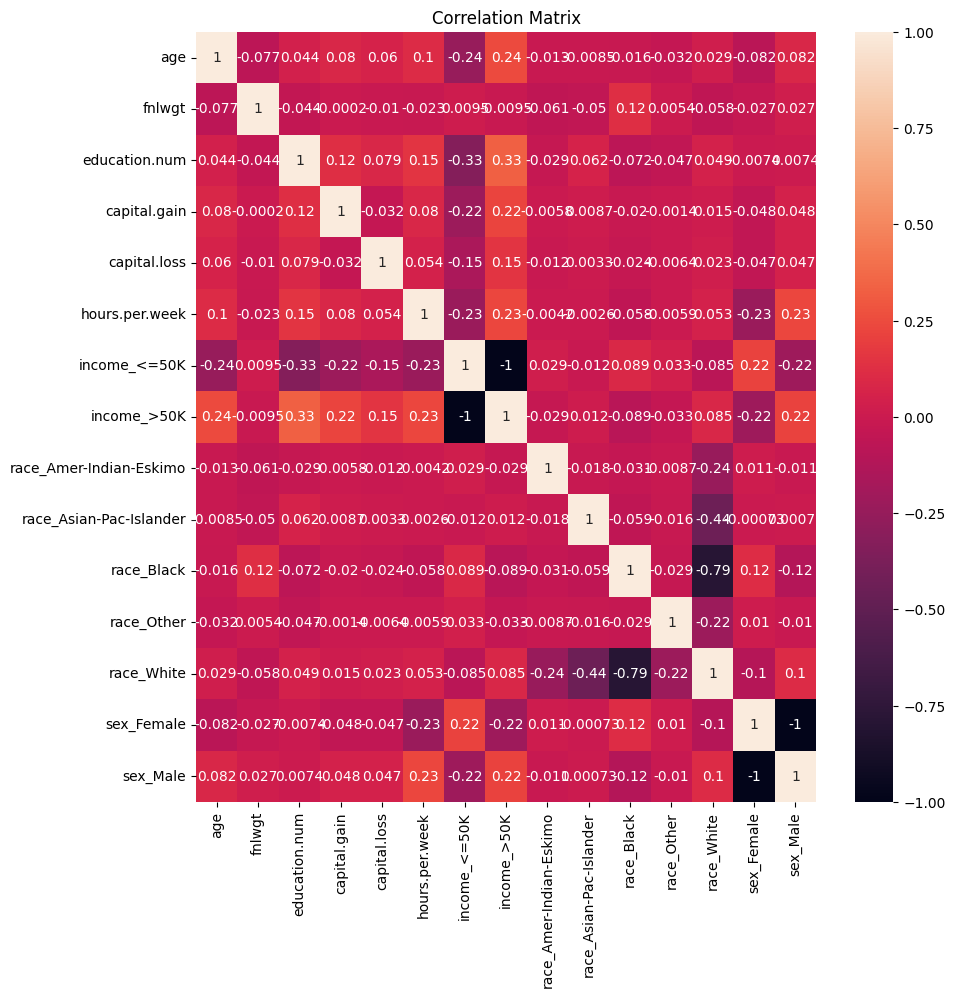

In [97]:
corr=df_viz.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr, annot = True)
plt.title('Correlation Matrix')
plt.show()

#### Demonstrating Scaling

In [122]:
scaler1= MinMaxScaler()
scaler2= StandardScaler()
s1,s2=pd.DataFrame(scaler1.fit_transform(df[['education.num']]),columns=['MinMaxScaled']),pd.DataFrame(scaler2.fit_transform(df[['education.num']]),columns=['StandardScaled'])
s=s1.join(s2)
new=pd.DataFrame()
new['education.num']=df['education.num']
new=new.join(s)
new.head()

,education.num,MinMaxScaled,StandardScaled
1,9,0.200000,-2.391928
3,4,0.533333,-0.440830
4,10,0.333333,-1.611489
5,9,1.000000,2.290705
6,6,0.533333,-0.440830


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='education.num', ylabel='MinMaxScaled'>

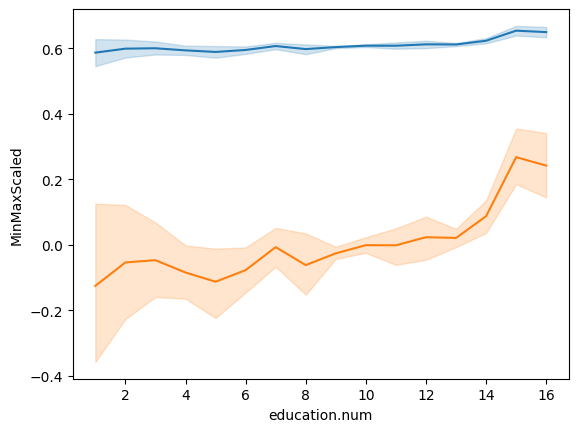

In [123]:
sns.lineplot(y='MinMaxScaled',x='education.num',data=new)
sns.lineplot(y='StandardScaled',x='education.num',data=new)
